In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [60]:
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

<b>Don't run this on windows, only on paperspace...

In [7]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

### Create Data

Load a ticker to get a realistic date index

In [347]:
TICKER = 'MSFT'

In [348]:
data = fat.get_price_data(TICKER)
data.head()
TICKER = 'FAKE-LINE-001'
PATH = f'data/{TICKER}-test'

Loaded data for MSFT: 1986-03-13 to 2018-02-26.


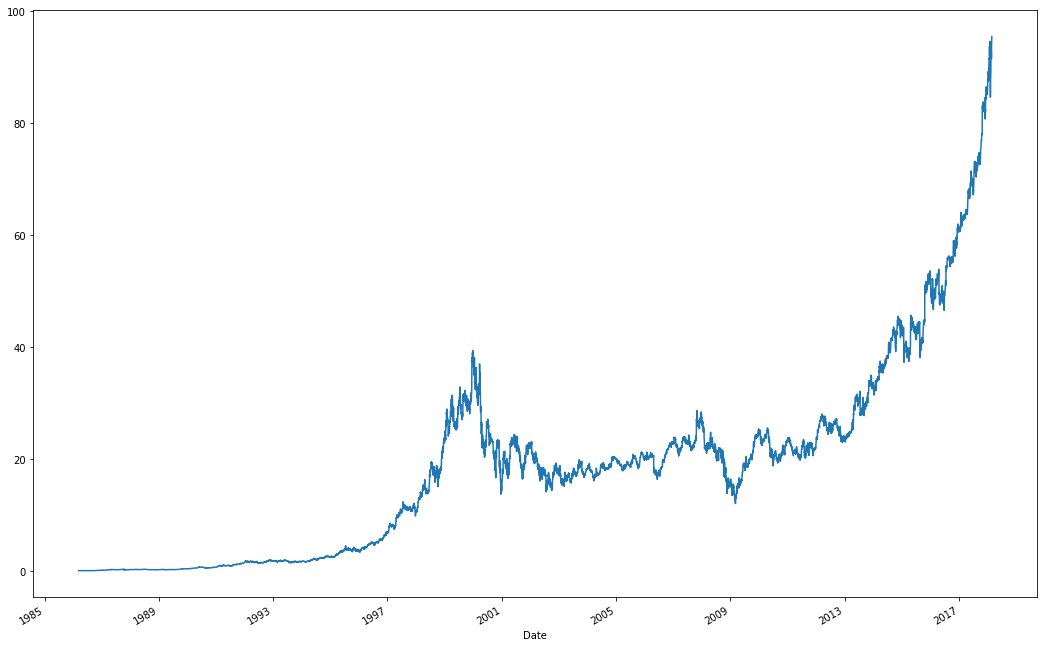

In [349]:
data['Adj Close'].plot()

In [350]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.064270,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.066566,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.067713,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.065992,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.064844,47894400


In [351]:
line_start = 5.2
line_slope = 20/365.0
line = np.empty((len(data),1))
for i in range(len(line)) :
    line[i] = line_start + i*line_slope

In [352]:
data['Adj Close'] = line
for i in range(-10, 0, 1) :
    data[f'Adj Close {i}d'] = data['Adj Close'].shift(-i)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close -10d,Adj Close -9d,Adj Close -8d,Adj Close -7d,Adj Close -6d,Adj Close -5d,Adj Close -4d,Adj Close -3d,Adj Close -2d,Adj Close -1d
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,5.200000,1031788800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,5.254795,308160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,5.309589,133171200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000,5.254795
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,5.364384,67766400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000,5.254795,5.309589
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,5.419178,47894400,NaN,NaN,NaN,NaN,NaN,NaN,5.2,5.254795,5.309589,5.364384


In [353]:
del data['Open']
del data['Low']
del data['High']
del data['Close']
del data['Volume']

In [354]:
#data['Open'] = data['Adj Close -1d']
#data['Low'] = data['Open']
#data['High'] = data['Adj Close']
#data['Close'] = data['Adj Close']
#data['Volume'] = 0

In [355]:
data = data.set_index('Date')
data = data.dropna()
data.head()

,Adj Close,Adj Close -10d,Adj Close -9d,Adj Close -8d,Adj Close -7d,Adj Close -6d,Adj Close -5d,Adj Close -4d,Adj Close -3d,Adj Close -2d,Adj Close -1d
Date,,,,,,,,,,,
1986-03-27,5.747945,5.200000,5.254795,5.309589,5.364384,5.419178,5.473973,5.528767,5.583562,5.638356,5.693151
1986-03-31,5.802740,5.254795,5.309589,5.364384,5.419178,5.473973,5.528767,5.583562,5.638356,5.693151,5.747945
1986-04-01,5.857534,5.309589,5.364384,5.419178,5.473973,5.528767,5.583562,5.638356,5.693151,5.747945,5.802740
1986-04-02,5.912329,5.364384,5.419178,5.473973,5.528767,5.583562,5.638356,5.693151,5.747945,5.802740,5.857534
1986-04-03,5.967123,5.419178,5.473973,5.528767,5.583562,5.638356,5.693151,5.747945,5.802740,5.857534,5.912329


## Create Features

In [356]:
#data = fat.create_dl_features_df(data)

In [357]:
data = data.dropna()
data[-14:].T

Date,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00
Adj Close,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096,446.295890,446.350685,446.405479,446.460274,446.515068,446.569863
Adj Close -10d,445.309589,445.364384,445.419178,445.473973,445.528767,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918
Adj Close -9d,445.364384,445.419178,445.473973,445.528767,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712
Adj Close -8d,445.419178,445.473973,445.528767,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507
Adj Close -7d,445.473973,445.528767,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301
Adj Close -6d,445.528767,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096
Adj Close -5d,445.583562,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096,446.295890
Adj Close -4d,445.638356,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096,446.295890,446.350685
Adj Close -3d,445.693151,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096,446.295890,446.350685,446.405479
Adj Close -2d,445.747945,445.802740,445.857534,445.912329,445.967123,446.021918,446.076712,446.131507,446.186301,446.241096,446.295890,446.350685,446.405479,446.460274


We're going to try to predict 'Adj Close' price tomorrow, so add a column with that info.

In [358]:
data['Adj Close +1d'] = data['Adj Close'].shift(-1)
data['Closed Higher Than Prev Close'] = data['Adj Close'] > data['Adj Close -1d']
#del data['Elapsed']
data.head().T

Date,1986-03-27 00:00:00,1986-03-31 00:00:00,1986-04-01 00:00:00,1986-04-02 00:00:00,1986-04-03 00:00:00
Adj Close,5.74795,5.80274,5.85753,5.91233,5.96712
Adj Close -10d,5.2,5.25479,5.30959,5.36438,5.41918
Adj Close -9d,5.25479,5.30959,5.36438,5.41918,5.47397
Adj Close -8d,5.30959,5.36438,5.41918,5.47397,5.52877
Adj Close -7d,5.36438,5.41918,5.47397,5.52877,5.58356
Adj Close -6d,5.41918,5.47397,5.52877,5.58356,5.63836
Adj Close -5d,5.47397,5.52877,5.58356,5.63836,5.69315
Adj Close -4d,5.52877,5.58356,5.63836,5.69315,5.74795
Adj Close -3d,5.58356,5.63836,5.69315,5.74795,5.80274
Adj Close -2d,5.63836,5.69315,5.74795,5.80274,5.85753


In [359]:
data = data.dropna()

In [360]:
DataFrameSummary(data).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Adj Close,8045,226.132,127.262,5.74795,115.94,226.132,336.323,446.515,8045,8045,0,0%,numeric
Adj Close -10d,8045,225.584,127.262,5.2,115.392,225.584,335.775,445.967,8045,8045,0,0%,numeric
Adj Close -9d,8045,225.638,127.262,5.25479,115.447,225.638,335.83,446.022,8045,8045,0,0%,numeric
Adj Close -8d,8045,225.693,127.262,5.30959,115.501,225.693,335.885,446.077,8045,8045,0,0%,numeric
Adj Close -7d,8045,225.748,127.262,5.36438,115.556,225.748,335.94,446.132,8045,8045,0,0%,numeric
Adj Close -6d,8045,225.803,127.262,5.41918,115.611,225.803,335.995,446.186,8045,8045,0,0%,numeric
Adj Close -5d,8045,225.858,127.262,5.47397,115.666,225.858,336.049,446.241,8045,8045,0,0%,numeric
Adj Close -4d,8045,225.912,127.262,5.52877,115.721,225.912,336.104,446.296,8045,8045,0,0%,numeric
Adj Close -3d,8045,225.967,127.262,5.58356,115.775,225.967,336.159,446.351,8045,8045,0,0%,numeric
Adj Close -2d,8045,226.022,127.262,5.63836,115.83,226.022,336.214,446.405,8045,8045,0,0%,numeric


In [361]:
data.columns

Index(['Adj Close', 'Adj Close -10d', 'Adj Close -9d', 'Adj Close -8d',
       'Adj Close -7d', 'Adj Close -6d', 'Adj Close -5d', 'Adj Close -4d',
       'Adj Close -3d', 'Adj Close -2d', 'Adj Close -1d', 'Adj Close +1d',
       'Closed Higher Than Prev Close'],
      dtype='object')

Break the columns up into "category variables" and "continuous variables".

In [362]:
cat_vars = ['Closed Higher Than Prev Close'] #'Days Since Trading', 'Days Until Trading', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            #'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

contin_vars = ['Adj Close', 'Adj Close -10d', 'Adj Close -9d', 'Adj Close -8d',
       'Adj Close -7d', 'Adj Close -6d', 'Adj Close -5d', 'Adj Close -4d',
       'Adj Close -3d', 'Adj Close -2d', 'Adj Close -1d'] 
              #['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Adj Close -10d',
              # 'Adj Close -9d', 'Adj Close -8d', 'Adj Close -7d', 'Adj Close -6d', 'Adj Close -5d',
              # 'Adj Close -4d', 'Adj Close -3d', 'Adj Close -2d', 'Adj Close -1d',
              # 'Year']


In [363]:
print(f'len(cat_vars) = {len(cat_vars)}')
print(f'len(contin_vars) = {len(contin_vars)}')
print(f'len(data.columns) = {len(data.columns)}')
assert(len(data.columns) == (len(cat_vars) + len(contin_vars) + 1))

len(cat_vars) = 1
len(contin_vars) = 11
len(data.columns) = 13


Split data into train and test sets.

In [364]:
data_len = len(data)
train_len = int(data_len * .8)
data_train = data[:train_len].copy()
data_test = data[train_len:].copy()

In [365]:
dep = 'Adj Close +1d'
data_train = data_train.reset_index()
data_train = data_train[cat_vars+contin_vars+[dep, 'Date']].copy()

In [366]:
data_train.tail().T

,6431,6432,6433,6434,6435
Closed Higher Than Prev Close,True,True,True,True,True
Adj Close,358.132,358.186,358.241,358.296,358.351
Adj Close -10d,357.584,357.638,357.693,357.748,357.803
Adj Close -9d,357.638,357.693,357.748,357.803,357.858
Adj Close -8d,357.693,357.748,357.803,357.858,357.912
Adj Close -7d,357.748,357.803,357.858,357.912,357.967
Adj Close -6d,357.803,357.858,357.912,357.967,358.022
Adj Close -5d,357.858,357.912,357.967,358.022,358.077
Adj Close -4d,357.912,357.967,358.022,358.077,358.132
Adj Close -3d,357.967,358.022,358.077,358.132,358.186


In [367]:
data_test[dep] = 0
data_test = data_test.reset_index()
data_test = data_test[cat_vars+contin_vars+[dep,'Date']].copy()

In [368]:
data_test.head().T

,0,1,2,3,4
Closed Higher Than Prev Close,True,True,True,True,True
Adj Close,358.405,358.46,358.515,358.57,358.625
Adj Close -10d,357.858,357.912,357.967,358.022,358.077
Adj Close -9d,357.912,357.967,358.022,358.077,358.132
Adj Close -8d,357.967,358.022,358.077,358.132,358.186
Adj Close -7d,358.022,358.077,358.132,358.186,358.241
Adj Close -6d,358.077,358.132,358.186,358.241,358.296
Adj Close -5d,358.132,358.186,358.241,358.296,358.351
Adj Close -4d,358.186,358.241,358.296,358.351,358.405
Adj Close -3d,358.241,358.296,358.351,358.405,358.46


In [369]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [370]:
for v in cat_vars: 
    data_train[v] = data_train[v].astype('category').cat.as_ordered()

In [371]:
apply_cats(data_test, data_train)

In [372]:
for v in contin_vars:
    data_train[v] = data_train[v].astype('float32')
    data_test[v] = data_test[v].astype('float32')

In [373]:
DataFrameSummary(data_train).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Closed Higher Than Prev Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6436,1,0,0%,constant
Adj Close,6436,182.049,101.811,5.74795,93.8986,182.049,270.2,358.351,6436,6436,0,0%,numeric
Adj Close -10d,6436,181.501,101.811,5.2,93.3507,181.501,269.652,357.803,6436,6436,0,0%,numeric
Adj Close -9d,6436,181.556,101.811,5.25479,93.4055,181.556,269.707,357.858,6436,6436,0,0%,numeric
Adj Close -8d,6436,181.611,101.811,5.30959,93.4603,181.611,269.762,357.912,6436,6436,0,0%,numeric
Adj Close -7d,6436,181.666,101.811,5.36438,93.5151,181.666,269.816,357.967,6436,6436,0,0%,numeric
Adj Close -6d,6436,181.721,101.811,5.41918,93.5699,181.721,269.871,358.022,6436,6436,0,0%,numeric
Adj Close -5d,6436,181.775,101.811,5.47397,93.6247,181.775,269.926,358.077,6436,6436,0,0%,numeric
Adj Close -4d,6436,181.83,101.811,5.52877,93.6795,181.83,269.981,358.132,6436,6436,0,0%,numeric
Adj Close -3d,6436,181.885,101.811,5.58356,93.7342,181.885,270.036,358.186,6436,6436,0,0%,numeric


We can now process our data...

In [374]:
# we get a AttributeError here if we don't have skip_flds = ['Date']
data_train = data_train.set_index('Date')
df_train, y, nas, mapper = proc_df(data_train, dep, do_scale=True)
yl = np.log(y)

In [375]:
df_train.head(2).T

Date,1986-03-27 00:00:00,1986-03-31 00:00:00
Closed Higher Than Prev Close,1.000000,1.000000
Adj Close,-1.731782,-1.731243
Adj Close -10d,-1.731782,-1.731243
Adj Close -9d,-1.731782,-1.731243
Adj Close -8d,-1.731782,-1.731243
Adj Close -7d,-1.731782,-1.731243
Adj Close -6d,-1.731782,-1.731243
Adj Close -5d,-1.731782,-1.731243
Adj Close -4d,-1.731782,-1.731243
Adj Close -3d,-1.731782,-1.731244


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [376]:
train_ratio = 0.75
data_size = len(df_train)
train_size = int(data_size * train_ratio)
val_idx = list(range(train_size, data_size))

In [377]:
data_test = data_test.set_index('Date')
df_test, _, nas, mapper = proc_df(data_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [378]:
#joined = joined.dropna()
#joined_test = joined_test.dropna()

## Deep Learning

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [379]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [380]:
# before: bs=128, changed to bs=8 to get results while finding learning rate
md = ColumnarModelData.from_data_frame(PATH, val_idx, df_train, yl.astype(np.float32), cat_flds=cat_vars, bs=32,
                                       test_df=df_test)

Create categorical variables.

In [381]:
cat_sz = [(c, len(data_train[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('Closed Higher Than Prev Close', 2)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [382]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(2, 1)]

Find learning rate.

In [383]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [384]:
m.lr_find(1e-7,1e-2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.529912   13.015423 



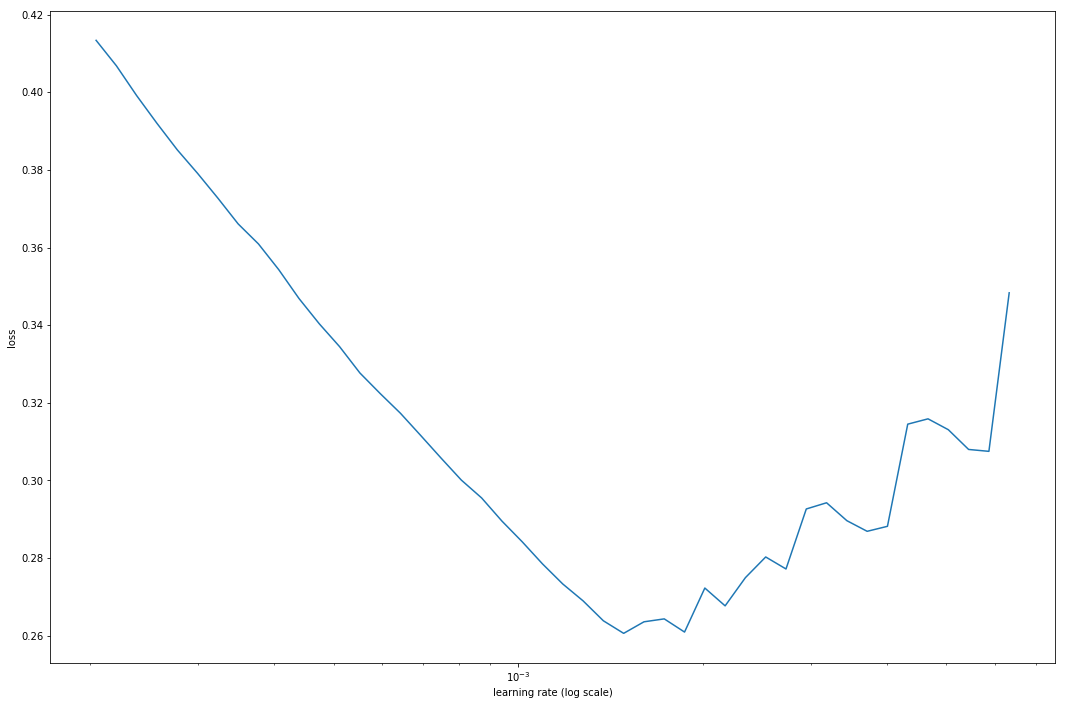

In [385]:
m.sched.plot(100)

### Sample

In [386]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [419]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.002576   0.000946   0.024448  
    1      0.003057   0.000684   0.02294                        
    2      0.002035   0.002719   0.0482                         



[0.0027188067, 0.048200459529161854]

In [424]:
m.fit(lr, 1, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.001332   0.002302   0.040597  



[0.002301985, 0.040596798703589614]

In [432]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.00143    0.000286   0.014861  
    1      0.001978   0.000261   0.013809                        
    2      0.000704   0.000284   0.014917                        
    3      0.0005     0.000685   0.022097                        
    4      0.001085   0.001428   0.034197                        
    5      0.000873   0.00043    0.016913                        
    6      0.000656   0.000203   0.011886                        
    7      0.000493   0.0002     0.012139                        



[0.00019970551, 0.012139075841914084]

In [430]:
m.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.00135    0.003924   0.057606  



[0.003924461, 0.05760573622136601]

In [ ]:
m.save('val0')

In [ ]:
m.load('val0')

In [433]:
x,y=m.predict_with_targs()

In [434]:
exp_rmspe(x,y)

0.01364784438510702

In [435]:
pred_test=m.predict(is_test=True)

In [436]:
pred_test = np.exp(pred_test)

In [437]:
data_test[dep]=pred_test

In [438]:
# prediction are made for the next day ('Date'+1), so shift data so that date is proper date for value predicted 
#predict = pd.DataFrame(data_test[dep].shift(1))
#predict.columns = [f'Predicted {TICKER} Price']
#predict[f'Actual {TICKER} Price'] = data['Adj Close']
#predict.dropna()
#predict['Prediction Error'] = predict[0] - predict[1]

In [439]:
predict = pd.DataFrame(data_test)

In [440]:
filename = f'{PATH}/{TICKER}-predictions-{dt.datetime.now():%Y%m%d-%H%M%S}.csv'
predict.to_csv(filename)

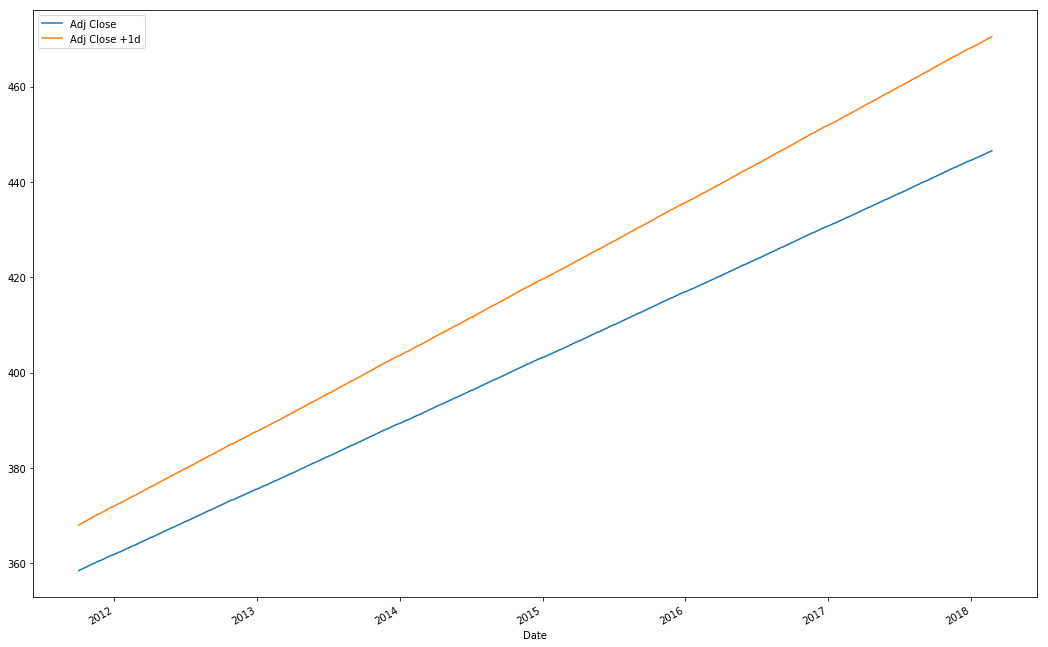

In [441]:
plot_data = pd.DataFrame(predict,columns=['Adj Close', 'Adj Close +1d'])
plot_data.plot()

In [397]:
m


MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(2, 1)
  )
  (lins): ModuleList(
    (0): Linear(in_features=12, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1, bias=True)
  (emb_drop): Dropout(p=0.04)
  (drops): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True)
)

In [77]:
rmse = np.sqrt(mean_squared_error(predict[0], predict[1]))
rmspe = rmse / len(predict)
#ex_rmspe = np.(rmspe)
print(f'RMSE = {rmse}')
print(f'RMSPE = {rmspe}')
#print(f'exp RMSPE = {ex_rmspe}')

NameError: name 'mean_squared_error' is not defined